In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [8]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day32-binning-and-binarization/train.csv'
df = pd.read_csv(url,usecols = ['Age','Fare','Survived'])

In [9]:
df.shape

(891, 3)

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(714, 3)

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10,scoring='accuracy'))

np.float64(0.6345266040688575)

In [48]:
kbin_age = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'quantile')

In [49]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [50]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [51]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [52]:
trf.named_transformers_['first'].n_bins_ #no. of bins in the first col

array([15])

In [53]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [54]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[0.42,
 6.0,
 16.0,
 19.0,
 21.0,
 23.0,
 25.0,
 28.0,
 30.0,
 32.0,
 35.0,
 38.0,
 42.0,
 47.0,
 54.0,
 80.0]

In [55]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf' : x_train_trf[:,0],
    'fare' : x_train['Fare'],
    'fare_trf' : x_train_trf[:,1]
})

In [56]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                             bins = trf.named_transformers_['second'].bin_edges_[0].tolist())


In [57]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
445,4.0,0.0,81.8583,13.0,"(0.42, 6.0]","(76.292, 108.9]"
343,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
89,24.0,5.0,8.0500,3.0,"(23.0, 25.0]","(7.896, 8.158]"
57,28.5,7.0,7.2292,0.0,"(28.0, 30.0]","(0.0, 7.25]"
441,20.0,3.0,9.5000,4.0,"(19.0, 21.0]","(8.158, 10.5]"


In [58]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

y_pred2 = clf.predict(x_test_trf)

In [59]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [60]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6303012519561815)

In [61]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins,encode='ordinal',strategy =strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins,encode='ordinal',strategy =strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10,scoring='accuracy')))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color = 'red')
    plt.title('After')

    plt.show()

0.6288732394366197


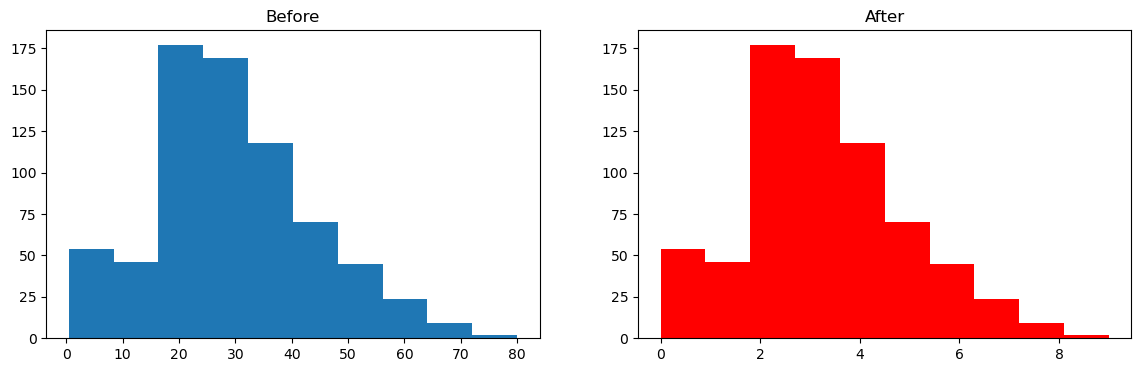

In [63]:
discretize(10,'uniform')

0.6303012519561816


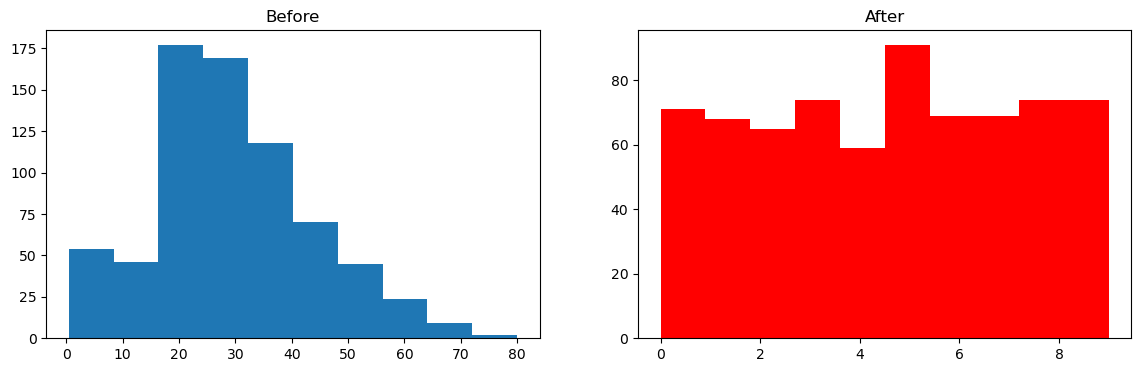

In [66]:
discretize(10,'quantile')

0.6331181533646322


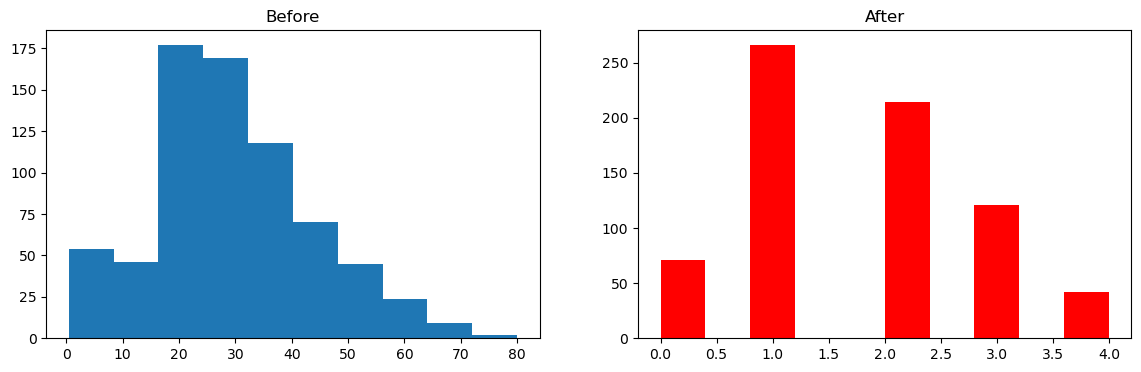

In [67]:
discretize(5,'kmeans')